In [1]:
from sensn_framework import CNN_MNIST
import matplotlib.pyplot as plt
from tf_explain.core.integrated_gradients import IntegratedGradients
import quantus
import numpy as np

/home/rafabacano/Desktop/Python/venv/lib/python3.12/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


In [2]:
modelo = CNN_MNIST()
modelo.setup()
print("Precisão:", modelo.model_accuracy())

A carregar dataset


I0000 00:00:1767179519.053290 2880582 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5680 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:07:00.0, compute capability: 7.5


Dataser carregado
A separar dataset
Shape das Imagens: (28, 28, 1)
Exemplo de Labels: 0
Train: 56000
Val: 7000
Test: 7000
Dataset separado
Modelo encontrado!


I0000 00:00:1767179522.241083 2880666 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Precisão: 0.9944285750389099


## Integrated Gradient

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


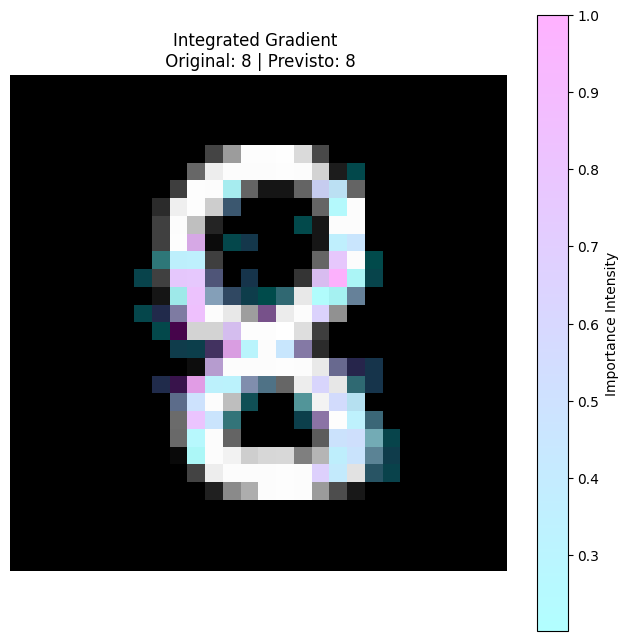

In [8]:
# Escolher imagem aleatória
num_samples = len(modelo.features)
random_idx = np.random.randint(0, num_samples)

random_image = modelo.features[random_idx][np.newaxis, ...]
actual_label = int(modelo.target[random_idx])

# Previsão
predictions = modelo.modelo.predict(random_image)
predicted_label = np.argmax(predictions, axis=1)[0]

# Explicação
explainer = IntegratedGradients()
explanation = explainer.explain(
    validation_data=(random_image, None),
    model=modelo.modelo,
    class_index=actual_label
)

# Simplificacao dos dados para visualização
explanation = np.squeeze(explanation)
original_image = np.squeeze(random_image)

explanation_norm = (explanation - explanation.min()) / (explanation.max() - explanation.min() + 1e-8)

# Mascara
threshold = 0.2
masked_explanation = np.ma.masked_where(explanation_norm < threshold, explanation_norm)

# Grafico
plt.figure(figsize=(8, 8))

plt.imshow(original_image, cmap='gray')
plt.imshow(masked_explanation, cmap='cool', alpha=0.3) 

# Updated Title with Prediction, Actual Label, and Confidence
plt.title(f"Integrated Gradient \n Original: {actual_label} | Previsto: {predicted_label}", 
          fontsize=12)

plt.axis('off')
plt.colorbar(label='Importance Intensity')
plt.show()

In [4]:
print(type(modelo.test_ds))

<class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>



--- A preparar dados para Sensitivity-n (Batch Size: 16) ---
Dados prontos. Shape X: (16, 28, 28, 1), Shape Y: (16,)
A gerar Integrated Gradients...


Gerando Explicações: 100%|██████████| 16/16 [00:01<00:00, 10.68it/s]


Explicações geradas. A iniciar Quantus...

RESULTADO FINAL SENSITIVITY-N (Batch 16):
Média do Score: 0.1918
Desvio Padrão: 0.0000


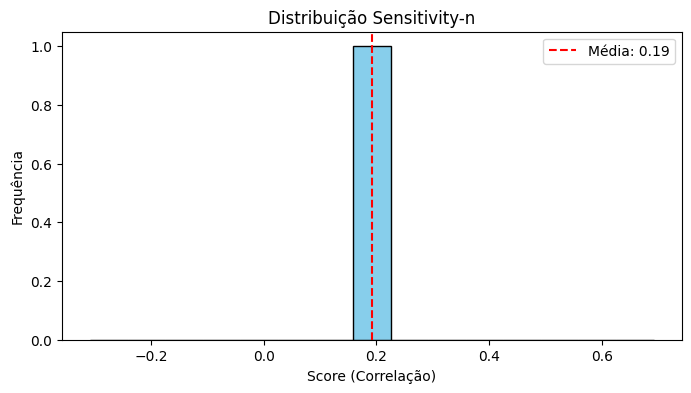


--- A gerar Curva de Perturbação (Amostras: 16) ---
A calcular importâncias (IG) para todas as imagens...
A aplicar máscaras e prever...
Passo 0.0% -> Confiança Média: 1.0000
Passo 10.0% -> Confiança Média: 0.4815
Passo 20.0% -> Confiança Média: 0.2306
Passo 30.0% -> Confiança Média: 0.1875
Passo 40.0% -> Confiança Média: 0.1875
Passo 50.0% -> Confiança Média: 0.1875
Passo 60.0% -> Confiança Média: 0.1875
Passo 70.0% -> Confiança Média: 0.1875
Passo 80.0% -> Confiança Média: 0.1875
Passo 90.0% -> Confiança Média: 0.1875
Passo 100.0% -> Confiança Média: 0.1875


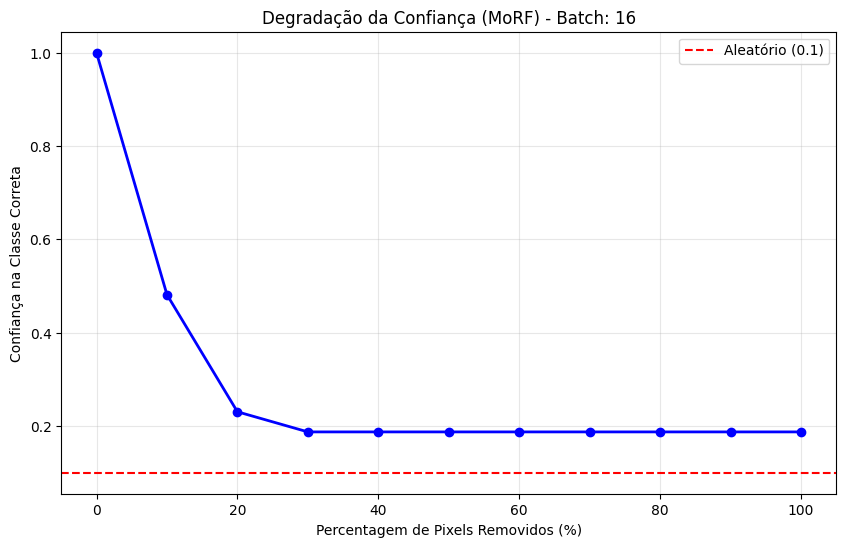

In [5]:
modelo.run_sensitivity_n_analysis()
modelo.plot_perturbation_curve()